In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
# CNN에 적용 가능한 데이터 타입으로 변경해준다. channel 추가 
X_train_full = np.expand_dims(X_train_full, -1)
X_test = np.expand_dims(X_test,-1)

X_train,X_vaild = X_train_full[:-5000], X_train_full[-5000:]
y_train,y_vaild = y_train_full[:-5000], y_train_full[-5000:]

print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape : (55000, 28, 28, 1)
y_train shape : (55000,)


In [7]:
X_train[0].shape # input shape 마지막 1은 channel 의 크기 만약 RGB : 3

(28, 28, 1)

In [8]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
Y_vaild = keras.utils.to_categorical(y_vaild)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=[28, 28, 1])) #units 의 갯수 64 ??
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2)) # 특징 추출
model.add(keras.layers.Flatten()) # 추출된 특징을 조합
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, batch_size=128, epochs=4)

Epoch 1/4
 19/430 [>.............................] - ETA: 1:47 - loss: 10.7749 - accuracy: 0.3339

KeyboardInterrupt: ignored

In [ ]:
np.round(model.predict(X_test))[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
score = model.evaluate(X_test, Y_test,
                       verbose=2)# verbose는 얼마나 정보를 자세하게 나타낼 것인가. 0,1,2 세가지로 나뉨
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 - 1s - loss: 0.0308 - accuracy: 0.9897
Test score: 0.030774587765336037
Test accuracy: 0.9897000193595886


In [ ]:
model.predict(X_test).argmax(axis=1)#softmax 로 나온 결과를 원래 결과로 되돌려주기 위한 방법

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [ ]:
# Plot confusion matrix 를 통해 맞는값들과 틀린값들을 비교해 보자. 
from sklearn.metrics import confusion_matrix
P_test = model.predict(X_test).argmax(axis=1)
confusion_matrix(y_test, P_test)

array([[ 976,    0,    0,    0,    0,    0,    1,    1,    0,    2],
       [   0, 1132,    1,    0,    0,    0,    1,    1,    0,    0],
       [   2,    1, 1022,    0,    1,    0,    0,    6,    0,    0],
       [   0,    0,    3, 1005,    0,    1,    0,    1,    0,    0],
       [   0,    0,    0,    0,  975,    0,    3,    0,    0,    4],
       [   3,    0,    1,    8,    0,  873,    3,    1,    0,    3],
       [   6,    2,    1,    0,    2,    4,  943,    0,    0,    0],
       [   0,    2,    3,    0,    0,    0,    0, 1020,    0,    3],
       [   6,    0,    6,    1,    1,    1,    1,    2,  953,    3],
       [   0,    1,    3,    0,    2,    2,    0,    2,    1,  998]],
      dtype=int64)

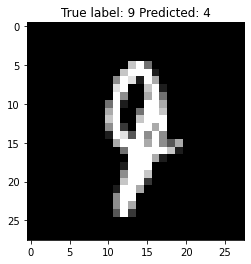

In [ ]:
miss_class_id = np.where(P_test != y_test)[0]
i = np.random.choice(miss_class_id)
X_test = X_test.reshape(10000, 28,28)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], P_test[i]));

In [ ]:
miss_class_id

array([ 184,  247,  259,  321,  340,  445,  495,  582,  625,  659,  740,
        947,  965, 1014, 1039, 1112, 1182, 1226, 1242, 1247, 1299, 1319,
       1364, 1393, 1522, 1530, 1681, 1709, 1717, 1737, 1790, 1878, 1901,
       1987, 2018, 2035, 2070, 2118, 2129, 2130, 2135, 2382, 2414, 2454,
       2462, 2488, 2597, 2654, 2896, 2921, 2939, 2953, 3023, 3073, 3225,
       3422, 3503, 3520, 3558, 3559, 3727, 3778, 3902, 3941, 4027, 4075,
       4078, 4176, 4205, 4207, 4256, 4359, 4360, 4497, 4536, 4571, 4639,
       4761, 4763, 4807, 4956, 5937, 5981, 5997, 6571, 6576, 6597, 6598,
       6625, 6651, 6783, 7821, 8059, 8273, 8527, 9009, 9664, 9679, 9692,
       9729, 9770, 9839, 9982], dtype=int64)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [ ]:
# https://subinium.github.io/Keras-5-1/

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
test_1=np.expand_dims(X_train_full, -1)/255

In [ ]:
test_1.shape

(60000, 28, 28, 1)

In [ ]:
np.argmax(model.predict(test_1),axis=1)

array([2, 8, 2, ..., 8, 4, 2], dtype=int64)